Notebook to study LJ pT and bound state mass resolution

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

Start by looking at default 2mu2e sample with 2mu2e selection and matched dark photons.

In [2]:
samples = [
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_150GeV_1p2GeV_6p4mm",
    "2Mu2E_200GeV_1p2GeV_4p8mm",
    "2Mu2E_500GeV_1p2GeV_1p9mm",
    "2Mu2E_800GeV_1p2GeV_1p2mm",
    "2Mu2E_1000GeV_1p2GeV_0p96mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e_matchedLj",
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
hists = output["out"]["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]

Output()

Output()

Take a look at ratio of LJ pT to dark photon pT

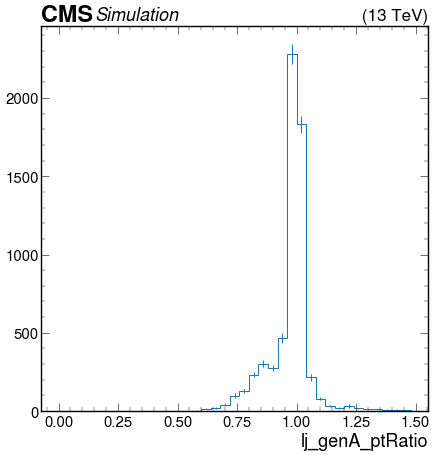

In [4]:
utilities.plot(hists["lj_genA_ptRatio"]["2mu2e_matchedLj", :1.5j])

Not bad. Try breaking it down by type.

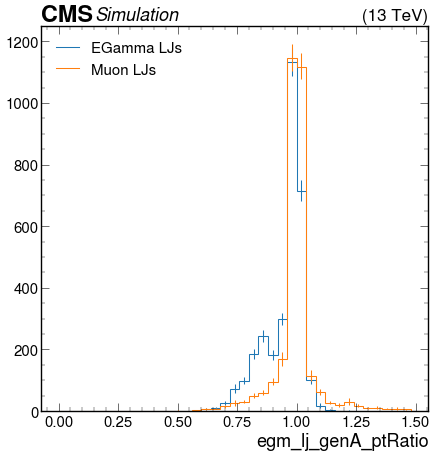

In [5]:
utilities.plot([
    hists["egm_lj_genA_ptRatio"]["2mu2e_matchedLj", :1.5j],
    hists["mu_lj_genA_ptRatio"]["2mu2e_matchedLj", :1.5j],
])
plt.legend(["EGamma LJs", "Muon LJs"])

Muon LJs do a little better job than EGamma and are a little more symmetric about 1.0, but both are pretty good.

Would be nice to see how this varies with bound state mass, dark photon decay length, and dsa- vs pf-muons. Plan to return to this later.

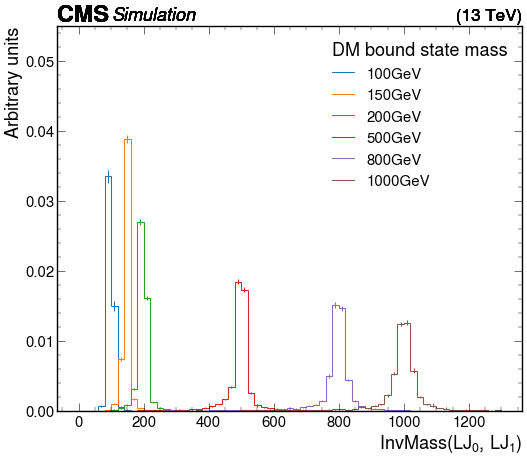

In [11]:
masses = [s.split("_")[1] for s in samples[1:]]
plt.subplots(1, 1, figsize=(12, 10))
plt.subplot(1, 1, 1)
for sample in samples[1:]:
    utilities.plot(output["out"][sample]["hists"]["lj_lj_invmass"]["2mu2e_matchedLj", :1300j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylabel("Arbitrary units")
    plt.ylim(0, 0.055)
plt.savefig("../../plots/lj_lj_invMass.png", bbox_inches="tight")